<a href="https://colab.research.google.com/github/Robsy14/TeoriaAprendizajeMaquina/blob/main/PARCIALES%20/Parcial1_TAM/Codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ames Housing Dataset**


El **Ames Housing Dataset** contiene información detallada de aproximadamente 2,930 viviendas en Ames, Iowa, con más de 80 variables que describen características físicas, estructurales y de ubicación.

- **Variable objetivo:** `SalePrice` (precio de venta).
- **Variables predictoras:** incluyen calidad, área, año de construcción, tipo de materiales, servicios, baños, habitaciones, garajes, y características del vecindario.
- **Uso principal:** predicción del precio de venta mediante modelos de regresión.
- Dataset ideal para análisis detallados y experimentación con técnicas de machine learning.



In [22]:
import pandas as pd
import kagglehub
import os

# Descargar el dataset desde KaggleHub
path = kagglehub.dataset_download("shashanknecrothapa/ames-housing-dataset")
print("Path to dataset files:", path)

archivo_csv=str(os.listdir(path))
print("Nombre del archivo CSV:", archivo_csv)






Path to dataset files: /kaggle/input/ames-housing-dataset
Nombre del archivo CSV: ['AmesHousing.csv']


## Revisión general del dataset

El primer paso de la exploración consiste en comprender la estructura básica del conjunto de datos: número de filas y columnas, nombres de las variables, tipos de datos, y estadísticas descriptivas generales.

Este diagnóstico inicial permitirá detectar posibles problemas como valores nulos, tipos de datos incorrectos, presencia de duplicados, o columnas irrelevantes para la tarea de aprendizaje supervisado.


In [23]:
# === CARGAR Y EXPLORAR DATASET ===

import pandas as pd


# Ruta completa al archivo CSV
archivo_csv = os.path.join(path, 'AmesHousing.csv')
df = pd.read_csv(archivo_csv)
df.head()

#  Dimensiones del dataset
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")


print("\nColumnas del dataset:")
print(df.columns.tolist())


El dataset tiene 2930 filas y 82 columnas

Columnas del dataset:
['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garag

In [24]:
print("\nInformación general del DataFrame:")
df.info()


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 no

In [25]:
print("\nEstadísticas básicas:")
display(df.describe().T)


Estadísticas básicas:


,count,mean,std,min,25%,50%,75%,max
Order,2930.0,1.465500e+03,8.459625e+02,1.0,7.332500e+02,1465.5,2.197750e+03,2.930000e+03
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03


In [26]:
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
print(f"\nVariables categóricas ({len(categorical_cols)}): {categorical_cols}")

print("\nFrecuencias para las primeras 5 columnas categóricas:")
for col in categorical_cols[:5]:
    print(f"\nFrecuencias de la variable '{col}':")
    print(df[col].value_counts(dropna=False).head())



Variables categóricas (43): ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']

Frecuencias para las primeras 5 columnas categóricas:

Frecuencias de la variable 'MS Zoning':
MS Zoning
RL         2273
RM          462
FV          139
RH           27
C (all)      25
Name: count, dtype: int64

Frecuencias de la variable 'Street':
Street
Pave    2918
Grvl      12
Name: count, dtype: int64

Frecuencias de la variable 'Alley':
Alley
Na

In [27]:
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0].sort_values(ascending=False)
print("\nColumnas con valores nulos:")
print(null_counts)





Columnas con valores nulos:
Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Cond        159
Garage Yr Blt      159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
BsmtFin SF 2         1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
Garage Area          1
Garage Cars          1
dtype: int64


In [28]:
# Verificar si hay filas duplicadas
print("\nNúmero de filas duplicadas:", df.duplicated().sum())


Número de filas duplicadas: 0


**Cierre de la revisión inicial del dataset**

Se completó de manera inicial la exploración general del dataset, identificando **82 variables** distribuidas en **43 categóricas** y **39 numéricas**.
 Varias columnas presentan valores nulos, en su mayoría asociados a la ausencia real de características (como piscina, chimenea, callejón, etc.), lo cual requerirá tratamiento contextual más adelante.

Entre las variables numéricas se encuentran medidas continuas (áreas, años, conteos) y la variable objetivo `SalePrice`. Sin embargo, algunas variables numéricas representan códigos o categorías discretas (`MS SubClass`, `Mo Sold`, `Yr Sold`) y otras funcionan como identificadores (`PID`, `Order`), por lo que su uso será evaluado cuidadosamente en las siguientes etapas.

Este diagnóstico inicial proporciona el inicio para las decisiones de limpieza, transformación y selección de variables que se abordarán en las fases posteriores de preprocesamiento e ingeniería de características.


# **Preprocesamiento del Dataset Ames Housing**


# **1.1 · Clasificación lógica de variables y diagnóstico estructural**

Antes de comenzar con el análisis visual y las transformaciones, es fundamental clasificar correctamente las variables del dataset y realizar un diagnóstico general. Esto permite detectar:

- Variables irrelevantes que deben eliminarse
- Variables numéricas que en realidad representan categorías
- Columnas con alta proporción de valores nulos
- Variables con varianza muy baja que aportan poco al modelo
- Variables con alta asimetría (skew), candidatas a transformaciones

Este análisis guía la posterior limpieza, codificación y transformación del dataset.



In [29]:
# Librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

target = 'SalePrice'
print(f"Variable objetivo definida: {target}")

# Variables irrelevantes (identificadores) eliminadas
irrelevant_vars = ['PID', 'Order']
df = df.drop(columns=irrelevant_vars)
print(f"Variables eliminadas por ser identificadores: {irrelevant_vars}")

# Variables numéricas que deben ser tratadas como categóricas
num_as_cat = ['MS SubClass', 'Mo Sold', 'Yr Sold']
df[num_as_cat] = df[num_as_cat].astype(str)
print(f"Convertidas a categóricas (object): {num_as_cat}")

# Columnas con más del 50% de valores nulos
null_over_50 = df.columns[df.isnull().mean() > 0.5].tolist()
print(f"Variables con más del 50% de valores nulos: {null_over_50}")

# Variables numéricas con baja varianza (<1)
low_variance = df.select_dtypes(include=['int64', 'float64']).std()
low_variance = low_variance[low_variance < 1].index.tolist()
print(f"Variables con baja varianza (<1): {low_variance}")

# Variables numéricas con alta asimetría (skew > 1)
skewed = df.select_dtypes(include=['int64', 'float64']).apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_high = skewed[skewed > 1].index.tolist()
print(f"Variables con alta asimetría (skew > 1): {skewed_high}")


Variable objetivo definida: SalePrice
Variables eliminadas por ser identificadores: ['PID', 'Order']
Convertidas a categóricas (object): ['MS SubClass', 'Mo Sold', 'Yr Sold']
Variables con más del 50% de valores nulos: ['Alley', 'Mas Vnr Type', 'Pool QC', 'Fence', 'Misc Feature']
Variables con baja varianza (<1): ['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Fireplaces', 'Garage Cars']
Variables con alta asimetría (skew > 1): ['Misc Val', 'Pool Area', 'Lot Area', 'Low Qual Fin SF', '3Ssn Porch', 'Kitchen AbvGr', 'BsmtFin SF 2', 'Enclosed Porch', 'Screen Porch', 'Bsmt Half Bath', 'Mas Vnr Area', 'Open Porch SF', 'Wood Deck SF', 'SalePrice', 'Lot Frontage', '1st Flr SF', 'BsmtFin SF 1', 'Gr Liv Area', 'Total Bsmt SF']


A partir de este diagnóstico se concluye que:

- La variable objetivo es `SalePrice`
- Se eliminaron las columnas `PID` y `Order` por no aportar valor predictivo
- Se reclasificaron como categóricas las variables `MS SubClass`, `Mo Sold` y `Yr Sold`
- Se identificaron varias columnas con más del 50% de valores nulos, que deberán tratarse con cuidado
- Algunas variables presentan baja varianza y otras alta asimetría, lo que sugiere aplicar transformaciones específicas

Estas observaciones estructurales se tendrán en cuenta en las etapas de limpieza, codificación y preparación del modelo.

# 1.2 · Visualización exploratoria del dataset

En esta sección se realiza un análisis gráfico detallado con el objetivo de comprender la distribución de la variable objetivo, detectar relaciones significativas entre variables, visualizar comportamientos atípicos (outliers) y respaldar futuras decisiones de transformación y codificación.

Las visualizaciones incluidas permiten:

- Evaluar la distribución y sesgo de `SalePrice`.
- Analizar cómo varía el precio según variables como `Overall Qual` y `Gr Liv Area`.
- Detectar outliers en variables numéricas clave.
- Visualizar correlaciones entre las variables más influyentes.
- Explorar categorías como `MS Zoning` y `Exter Qual` que podrían impactar el valor de las viviendas.



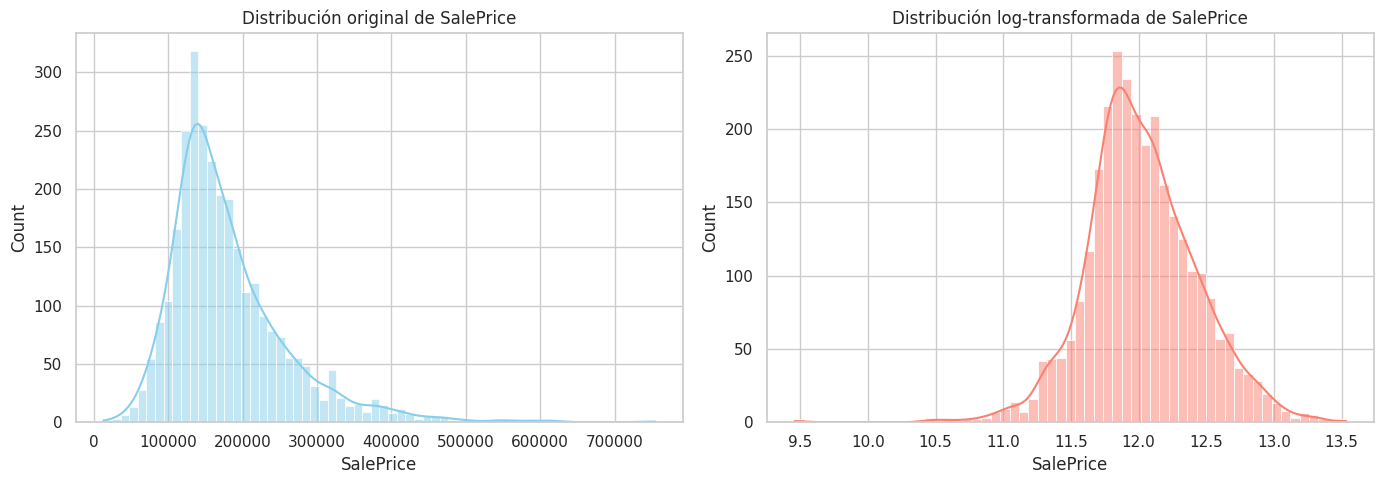

In [30]:

# Estilos globales
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


# --- Distribución original vs log-transformada de SalePrice ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['SalePrice'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribución original de SalePrice")
sns.histplot(np.log1p(df['SalePrice']), kde=True, ax=axes[1], color='salmon')
axes[1].set_title("Distribución log-transformada de SalePrice")
plt.tight_layout()
plt.show()

La gráfica izquierda muestra la distribución original de los precios de venta (SalePrice). Se observa una clara asimetría positiva (skewness), donde la mayoría de las casas tienen precios concentrados en rangos bajos a medios, pero existe una cola larga hacia valores altos, indicando la presencia de casas con precios considerablemente elevados.

La gráfica derecha presenta la distribución después de aplicar la transformación logarítmica log1p, que suaviza la asimetría y acerca la distribución a una forma más simétrica y cercana a una distribución normal. Esta transformación es especialmente útil para técnicas de modelado que asumen normalidad en la variable objetivo o para mejorar la estabilidad numérica y el desempeño de los modelos

<ipython-input-31-8e8e8b5c99e7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Overall Qual', y='SalePrice', data=df, palette='crest')


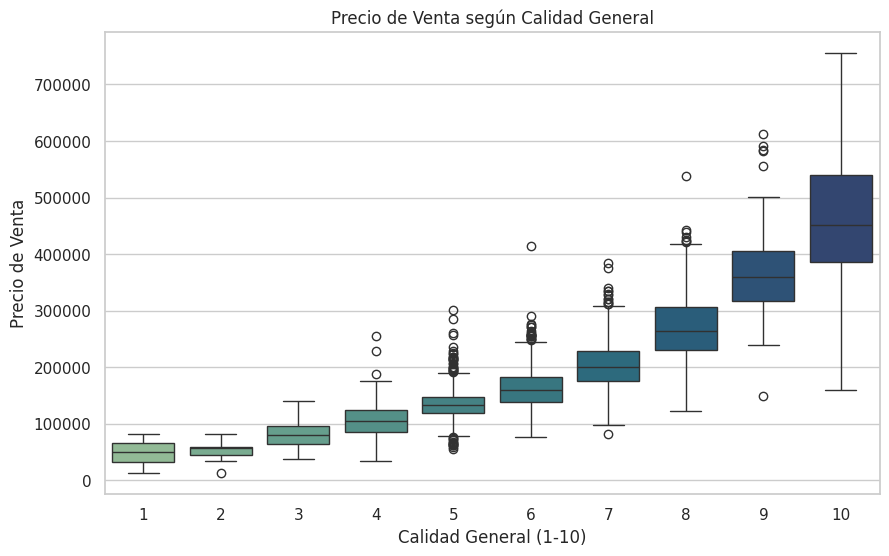

In [31]:
# --- Boxplot de Calidad General vs Precio de Venta ---
sns.boxplot(x='Overall Qual', y='SalePrice', data=df, palette='crest')
plt.title("Precio de Venta según Calidad General")
plt.xlabel("Calidad General (1-10)")
plt.ylabel("Precio de Venta")
plt.show()

Precio de Venta según Calidad General (Overall Qual)

Este diagrama de caja (boxplot) muestra la relación entre la calidad general de la vivienda, evaluada en una escala de 1 a 10, y el precio de venta (SalePrice).

Se observa una clara tendencia ascendente: a medida que la calidad general aumenta, también lo hace el precio de venta promedio. Las casas con calidad baja (valores cercanos a 1 o 2) tienen precios significativamente menores y menor variabilidad, mientras que las casas con calidad alta (valores cercanos a 9 o 10) alcanzan precios mucho más elevados y presentan una mayor dispersión en los valores, indicando una diversidad en las características de las viviendas dentro de esas categorías.

Además, se identifican algunos valores atípicos (outliers) en casi todas las categorías, lo que es común en datos inmobiliarios donde propiedades excepcionales o en ubicaciones privilegiadas pueden desviarse del patrón general.

Esta gráfica confirma que la calidad general es una variable predictiva relevante para el precio de venta.

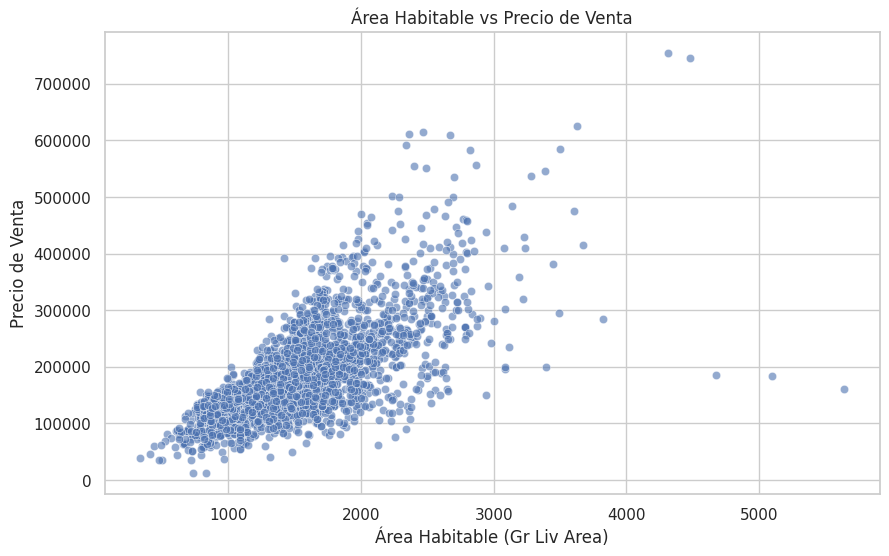

In [32]:
# --- Scatterplot de Área Habitable vs Precio de Venta ---
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df, alpha=0.6)
plt.title("Área Habitable vs Precio de Venta")
plt.xlabel("Área Habitable (Gr Liv Area)")
plt.ylabel("Precio de Venta")
plt.show()

El diagrama de dispersión muestra la relación entre el área habitable de las viviendas y su precio de venta. Se observa una clara correlación positiva: a medida que aumenta el área habitable, también tiende a aumentar el precio de venta.

La mayoría de los puntos se agrupan en áreas de tamaño medio (alrededor de 1000 a 3000 pies cuadrados) con precios correspondientes entre aproximadamente 50,000 y 400,000.

Sin embargo, hay algunas viviendas con áreas muy grandes y precios muy elevados que se alejan del grupo principal, lo que indica valores atípicos o propiedades excepcionales.

Esta relación respalda la importancia del área habitable como variable predictiva para el precio de la vivienda, mostrando que viviendas más grandes tienden a valer más, aunque con cierta dispersión debido a otros factores.

<ipython-input-33-84fabeb25c64>:32: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


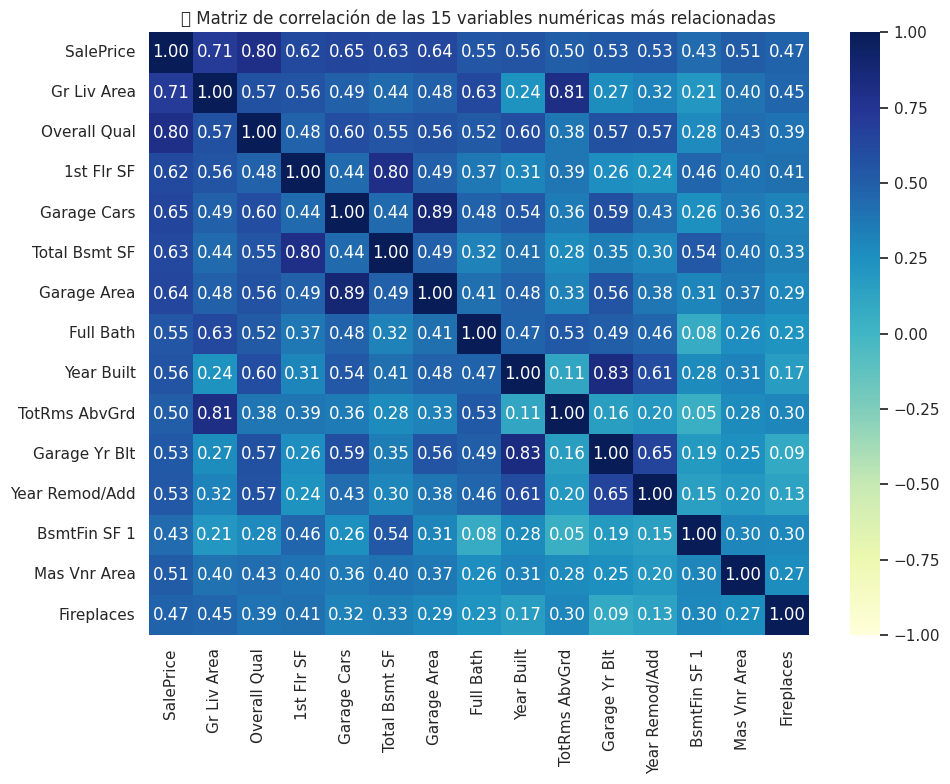

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extraemos todas las variables numéricas del dataset.
# Solo estas pueden ser usadas para calcular correlaciones directamente.
numeric_vars = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculamos la matriz de correlación de Pearson entre todas las variables numéricas.
# Esto nos permitirá identificar relaciones lineales entre las variables.
corr_matrix = data[numeric_vars].corr()

# Calculamos la media de la correlación absoluta de cada variable respecto a todas las demás.
# Así podemos identificar las variables más "relacionadas" en general con el resto del dataset.
mean_corr = corr_matrix.abs().mean().sort_values(ascending=False)

# Seleccionamos las 15 variables numéricas con mayor correlación promedio.
# Estas serán las más informativas para entender la estructura interna del dataset.
top_vars = mean_corr.head(15).index.tolist()

# Filtramos la matriz de correlación solo para estas 15 variables más correlacionadas.
top_corr_matrix = corr_matrix.loc[top_vars, top_vars]

# Visualizamos la matriz de correlación de estas variables con un mapa de calor.
# Esto permite identificar relaciones fuertes entre pares de variables, como redundancias o dependencias.
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, fmt=".2f", cmap='YlGnBu', vmin=-1, vmax=1, center=0)

# Título descriptivo del gráfico
plt.title('🔍 Matriz de correlación de las 15 variables numéricas más relacionadas')

# Ajustamos el diseño para mejor visibilidad
plt.tight_layout()
plt.show()

En general, las variables que aparecen en esta selección suelen incluir:

SalePrice: variable objetivo, precio final de venta.

Overall Qual: calidad general del material y acabado de la casa.

Gr Liv Area: área habitable sobre el suelo (sin sótanos), en pies cuadrados.

Garage Cars / Garage Area: número de autos que caben en el garaje y su superficie total.

Total Bsmt SF / 1st Flr SF: área total del sótano y primer piso.

Year Built / Year Remod/Add: año de construcción o remodelación, afectan el valor percibido.

TotRms AbvGrd: número total de habitaciones por encima del nivel del suelo.

Fireplaces: número de chimeneas, una característica valorada en muchas viviendas.

Mas Vnr Area: área de revestimiento de mampostería, influye en la estética.

BsmtFin SF 1: superficie del sótano terminado.

Estas variables no solo están fuertemente correlacionadas entre sí, sino también con

el precio de venta. Esto indica que forman parte de un mismo "sistema de valor" dentro del dataset y, por tanto, son claves en el modelado predictivo.

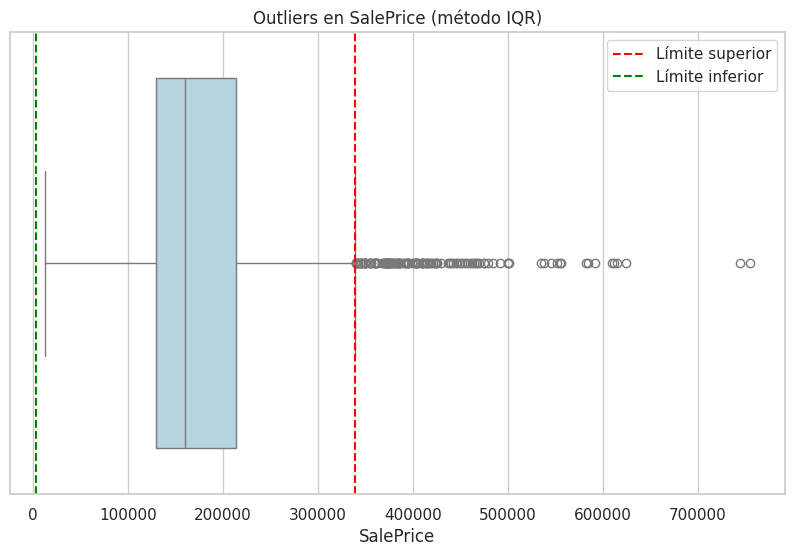

In [34]:
# Outliers en SalePrice con método IQR
q1 = df['SalePrice'].quantile(0.25)
q3 = df['SalePrice'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

sns.boxplot(x=df['SalePrice'], color='lightblue')
plt.axvline(upper_limit, color='red', linestyle='--', label='Límite superior')
plt.axvline(lower_limit, color='green', linestyle='--', label='Límite inferior')
plt.legend()
plt.title("Outliers en SalePrice (método IQR)")
plt.show()

### Detección de outliers en SalePrice usando el método IQR

El diagrama de caja (boxplot) muestra la distribución de la variable objetivo SalePrice con los límites calculados mediante el rango intercuartílico (IQR):

- La línea roja discontinua representa el límite superior (Q3 + 1.5 * IQR), más allá del cual se consideran outliers (valores atípicos altos).
- La línea verde discontinua indica el límite inferior (Q1 - 1.5 * IQR), que en este caso es cercana a cero debido a la distribución positiva de los precios.
- Se observan varios outliers a la derecha, es decir, casas con precios significativamente más altos que el rango típico.
- Esta visualización es útil para entender la presencia y extensión de valores atípicos en la variable objetivo, que pueden afectar el modelado y requerir tratamientos específicos.


#**Conclusiones del análisis visual exploratorio:**

- La variable `SalePrice` presenta una asimetría positiva significativa, lo que justifica la aplicación de transformaciones logarítmicas para mejorar su distribución.
- Variables como `Overall Qual` y `Gr Liv Area` muestran una fuerte correlación positiva con el precio de venta, evidenciando su relevancia predictiva.
- El análisis de outliers revela la presencia de valores extremos en `SalePrice`, los cuales podrían influir en el desempeño de algunos modelos y requieren atención.
- La variable categórica `MS Zoning` exhibe diferencias marcadas en el precio promedio, consolidando su valor como predictor.
- La distribución ordinal de `Exter Qual` está bien definida, lo que facilita su posterior codificación adecuada.
- La matriz de correlación permite identificar las variables numéricas más influyentes, facilitando la selección informada de características para el modelado.

Este análisis visual constituye una base sólida para fundamentar las decisiones de preprocesamiento y modelado que se abordarán en las siguientes etapas.

#**Tratamiento de valores nulos y duplicados**

En esta sección se abordan los valores faltantes del dataset utilizando estrategias específicas según la naturaleza de cada variable.

No todos los `NaN` representan errores o pérdidas de información. En algunos casos, indican la ausencia real de una característica (ej. sin callejón, sin chimenea, sin piscina), por lo que deben ser codificados explícitamente y no imputados de forma numérica.

El tratamiento será distinto para variables categóricas y numéricas, con el objetivo de preservar la coherencia semántica del dataset.

In [35]:
# Resumen total y porcentaje de nulos por columna
nulls = df.isnull().sum()
null_percent = (nulls / len(df)) * 100
null_summary = pd.DataFrame({'Nulos': nulls, '% Nulos': null_percent}) \
                 .query("Nulos > 0").sort_values(by='% Nulos', ascending=False)
print("Resumen de valores nulos por columna:")
print(null_summary)

Resumen de valores nulos por columna:
                Nulos    % Nulos
Pool QC          2917  99.556314
Misc Feature     2824  96.382253
Alley            2732  93.242321
Fence            2358  80.477816
Mas Vnr Type     1775  60.580205
Fireplace Qu     1422  48.532423
Lot Frontage      490  16.723549
Garage Qual       159   5.426621
Garage Cond       159   5.426621
Garage Yr Blt     159   5.426621
Garage Finish     159   5.426621
Garage Type       157   5.358362
Bsmt Exposure      83   2.832765
BsmtFin Type 2     81   2.764505
Bsmt Cond          80   2.730375
Bsmt Qual          80   2.730375
BsmtFin Type 1     80   2.730375
Mas Vnr Area       23   0.784983
Bsmt Full Bath      2   0.068259
Bsmt Half Bath      2   0.068259
BsmtFin SF 1        1   0.034130
BsmtFin SF 2        1   0.034130
Electrical          1   0.034130
Total Bsmt SF       1   0.034130
Bsmt Unf SF         1   0.034130
Garage Area         1   0.034130
Garage Cars         1   0.034130


In [36]:
# Reemplazo de NaN por 'None' en variables categóricas que indican ausencia
ausencia_objetos = [
    'Alley', 'Fireplace Qu', 'Garage Type', 'Garage Finish',
    'Garage Qual', 'Garage Cond', 'Bsmt Qual', 'Bsmt Cond',
    'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
    'Pool QC', 'Fence', 'Misc Feature', 'Mas Vnr Type'
]

reemplazadas = []
for col in ausencia_objetos:
    if col in df.columns:
        df[col] = df[col].fillna('None')
        reemplazadas.append(col)
print(f"Reemplazadas por 'None': {reemplazadas}")

# Imputación con mediana para variables numéricas con nulos
imputar_mediana = [
    'Mas Vnr Area', 'Garage Yr Blt', 'Lot Frontage',
    'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
    'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area'
]

imputados = []
for col in imputar_mediana:
    if col in df.columns:
        valor = df[col].median()
        df[col] = df[col].fillna(valor)
        imputados.append((col, valor))
print("Variables numéricas imputadas con mediana:")
for col, val in imputados:
    print(f"  - {col}: {val}")

# Imputación con moda para variables categóricas restantes
imputar_moda = ['Electrical']
imputados_moda = []
for col in imputar_moda:
    if col in df.columns:
        valor = df[col].mode()[0]
        df[col] = df[col].fillna(valor)
        imputados_moda.append((col, valor))
print("Variables categóricas imputadas con moda:")
for col, val in imputados_moda:
    print(f"  - {col}: {val}")

# Verificación final de nulos y duplicados
nulos_restantes = df.isnull().sum().sum()
columnas_con_nulos = df.columns[df.isnull().any()].tolist()
duplicados = df.duplicated().sum()

print(f"\nTotal de valores nulos restantes: {nulos_restantes}")
print(f"Columnas con nulos restantes: {columnas_con_nulos}")

if duplicados > 0:
    df = df.drop_duplicates()
    print(f"Duplicados encontrados y eliminados: {duplicados}")
else:
    print("No se encontraron filas duplicadas.")

Reemplazadas por 'None': ['Alley', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Pool QC', 'Fence', 'Misc Feature', 'Mas Vnr Type']
Variables numéricas imputadas con mediana:
  - Mas Vnr Area: 0.0
  - Garage Yr Blt: 1979.0
  - Lot Frontage: 68.0
  - BsmtFin SF 1: 370.0
  - BsmtFin SF 2: 0.0
  - Bsmt Unf SF: 466.0
  - Total Bsmt SF: 990.0
  - Bsmt Full Bath: 0.0
  - Bsmt Half Bath: 0.0
  - Garage Cars: 2.0
  - Garage Area: 480.0
Variables categóricas imputadas con moda:
  - Electrical: SBrkr

Total de valores nulos restantes: 0
Columnas con nulos restantes: []
No se encontraron filas duplicadas.


Con este tratamiento, el dataset queda completamente limpio y listo para las fases de codificación, transformación y selección de variables.

#**Codificación de variables categóricas y transformaciones numéricas**

En esta sección se identifican las variables categóricas originales y se codifican mediante One-Hot Encoding para prepararlas para el modelado.

Posteriormente, se analiza la asimetría de las variables numéricas para aplicar transformaciones logarítmicas en aquellas con alta desviación, buscando mejorar la normalidad y el desempeño del modelo.

Este preprocesamiento es fundamental para convertir datos categóricos en un formato numérico interpretable por los algoritmos y para manejar sesgos en variables continuas.


In [37]:
# Identificar variables categóricas originales (tipo object o string)
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
print(f"Variables categóricas encontradas: {len(cat_cols)} columnas")
print(f"Primeras 10 variables categóricas: {cat_cols[:10]}")


Variables categóricas encontradas: 46 columnas
Primeras 10 variables categóricas: ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood']


In [38]:
# Aplicar One-Hot Encoding a todas las variables categóricas
#    - drop_first=True para evitar multicolinealidad en modelos lineales
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print(f"Dimensiones del dataset después de codificación: {df_encoded.shape}")

Dimensiones del dataset después de codificación: (2930, 303)


In [39]:
# Variables numéricas para analizar skewness (excluyendo variable objetivo)
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('SalePrice')

# Detectar variables con skew positivo alto (>1)
skewed = df_encoded[numeric_cols].skew().sort_values(ascending=False)
skewed_high = skewed[skewed > 1].index.tolist()
print(f"Variables numéricas con alta asimetría (skew > 1): {skewed_high}")


Variables numéricas con alta asimetría (skew > 1): ['Misc Val', 'Pool Area', 'Lot Area', 'Low Qual Fin SF', '3Ssn Porch', 'Kitchen AbvGr', 'BsmtFin SF 2', 'Enclosed Porch', 'Screen Porch', 'Bsmt Half Bath', 'Mas Vnr Area', 'Open Porch SF', 'Wood Deck SF', 'Lot Frontage', '1st Flr SF', 'BsmtFin SF 1', 'Gr Liv Area', 'Total Bsmt SF']


In [40]:
# Transformación logarítmica
cols_log_transformed = []
for col in skewed_high:
    if (df_encoded[col] < 0).any():
        print(f"Atención: {col} tiene valores negativos y no se transformará.")
        continue
    df_encoded[col] = np.log1p(df_encoded[col])
    cols_log_transformed.append(col)

print(f"Variables transformadas logarítmicamente: {cols_log_transformed}")
print(f"Dataset final listo para modelado con dimensiones: {df_encoded.shape}")

Variables transformadas logarítmicamente: ['Misc Val', 'Pool Area', 'Lot Area', 'Low Qual Fin SF', '3Ssn Porch', 'Kitchen AbvGr', 'BsmtFin SF 2', 'Enclosed Porch', 'Screen Porch', 'Bsmt Half Bath', 'Mas Vnr Area', 'Open Porch SF', 'Wood Deck SF', 'Lot Frontage', '1st Flr SF', 'BsmtFin SF 1', 'Gr Liv Area', 'Total Bsmt SF']
Dataset final listo para modelado con dimensiones: (2930, 303)


Como resultado, se obtiene un dataset codificado y transformado, listo para la fase de modelado.

- Las variables categóricas son representadas mediante variables dummy sin multicolinealidad.
- Las variables numéricas con alta asimetría han sido transformadas logarítmicamente para mejorar su distribución.

#** Separación de variables, división de conjuntos y escalado**

En esta sección se separa la variable objetivo de las características predictoras y se divide el conjunto de datos en entrenamiento y prueba.

Se identifican las variables numéricas y binarias para aplicar escalado solo a las numéricas mediante `StandardScaler`. Esto garantiza que las magnitudes de las variables numéricas sean comparables, mientras que las variables binarias permanecen intactas.

El escalado se realiza ajustando el transformador solo con el conjunto de entrenamiento para evitar la fuga de información hacia el conjunto de prueba.

In [41]:
# === Separación de variables, división de conjuntos y escalado ===

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# 1Separar variable objetivo y features
y = df_encoded['SalePrice']
X = df_encoded.drop(columns=['SalePrice'])

print(f"Variable objetivo: y → {y.name}")
print(f"Shape de X: {X.shape} | Shape de y: {y.shape}")

# División aleatoria en conjuntos de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Conjuntos de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Conjuntos de prueba: {X_test.shape}, {y_test.shape}")


Variable objetivo: y → SalePrice
Shape de X: (2930, 302) | Shape de y: (2930,)
Conjuntos de entrenamiento: (2344, 302), (2344,)
Conjuntos de prueba: (586, 302), (586,)


In [42]:
# Identificar columnas numéricas y binarias
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['uint8', 'bool']).columns.tolist()

print(f"Variables numéricas para escalar: {len(num_cols)}")
print(f"Variables binarias sin escalar: {len(cat_cols)}")

# Crear preprocesador para escalado
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', 'passthrough', cat_cols)
    ]
)

# Ajustar y transformar
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Convertir de nuevo a DataFrame para facilitar análisis posterior
new_cols = num_cols + cat_cols
X_train_scaled = pd.DataFrame(X_train_scaled, columns=new_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=new_cols, index=X_test.index)

print("Escalado aplicado solo a variables numéricas.")
print(f"Shape X_train escalado: {X_train_scaled.shape}")
print(f"Shape X_test escalado: {X_test_scaled.shape}")

Variables numéricas para escalar: 33
Variables binarias sin escalar: 269
Escalado aplicado solo a variables numéricas.
Shape X_train escalado: (2344, 302)
Shape X_test escalado: (586, 302)


In [43]:
# verificar medias y desviaciones estándar
print("\nMedia variables numéricas escaladas (train):")
print(X_train_scaled[num_cols].mean())

print("\nDesviación estándar variables numéricas escaladas (train):")
print(X_train_scaled[num_cols].std())


Media variables numéricas escaladas (train):
Lot Frontage       5.335133e-16
Lot Area          -1.774841e-15
Overall Qual      -2.425061e-17
Overall Cond      -3.429187e-16
Year Built        -2.712279e-15
Year Remod/Add    -3.576964e-15
Mas Vnr Area      -6.062651e-18
BsmtFin SF 1       2.182554e-16
BsmtFin SF 2      -1.515663e-17
Bsmt Unf SF       -6.972049e-17
Total Bsmt SF     -3.940723e-16
1st Flr SF        -1.549007e-15
2nd Flr SF        -3.410241e-18
Low Qual Fin SF    1.288313e-17
Gr Liv Area       -2.617550e-15
Bsmt Full Bath    -4.850121e-17
Bsmt Half Bath    -3.789157e-17
Full Bath          9.700242e-17
Half Bath          5.077470e-17
Bedroom AbvGr      2.326542e-16
Kitchen AbvGr     -4.971374e-16
TotRms AbvGrd     -3.486025e-17
Fireplaces        -2.121928e-17
Garage Yr Blt     -3.657294e-15
Garage Cars        7.881447e-17
Garage Area        5.304820e-17
Wood Deck SF      -2.121928e-16
Open Porch SF     -4.243856e-17
Enclosed Porch    -8.336146e-18
3Ssn Porch        -6.06265